In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("1rec-crime-pfa.csv", index_col=0, parse_dates=True)
df.head()

,PFA,Region,Offence,Rolling year total number of offences
12 months ending,,,,
2003-03-31,Avon and Somerset,South West,All other theft offences,25959
2003-03-31,Avon and Somerset,South West,Bicycle theft,3090
2003-03-31,Avon and Somerset,South West,Criminal damage and arson,26202
2003-03-31,Avon and Somerset,South West,Death or serious injury caused by illegal driving,2
2003-03-31,Avon and Somerset,South West,Domestic burglary,14561


In [70]:
df.dtypes

PFA                                      object
Region                                   object
Offence                                  object
Rolling year total number of offences     int64
dtype: object

In [71]:
cols = list(df.columns)
cols

['PFA', 'Region', 'Offence', 'Rolling year total number of offences']

In [72]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'PFA': 0,
 'Region': 0,
 'Offence': 0,
 'Rolling year total number of offences': 0}

In [74]:
offences_stat = {"min": df["Rolling year total number of offences"].min(), 
            "max": df["Rolling year total number of offences"].max(), 
            "mean": df["Rolling year total number of offences"].mean(),
            "median": df["Rolling year total number of offences"].median(),
            "mode": df["Rolling year total number of offences"].mode().to_list(),
            "var": df["Rolling year total number of offences"].var(ddof=0),
            "std": df["Rolling year total number of offences"].std(ddof=0),
            "range": df["Rolling year total number of offences"].max() - df["Rolling year total number of offences"].min(),
            "interquartile_range": df["Rolling year total number of offences"].quantile(0.75) - df["Rolling year total number of offences"].quantile(0.25),
            "skew": df["Rolling year total number of offences"].skew()
            }
offences_stat

{'min': -53,
 'max': 308901,
 'mean': 5266.331705007639,
 'median': 2011.0,
 'mode': [0],
 'var': 166811319.2283264,
 'std': 12915.545641912555,
 'range': 308954,
 'interquartile_range': 5051.0,
 'skew': 11.135052591328055}

Видим отрицательное значение. Скорее всего это просто опечатка. На этапе предобработки нужно будет поработать с этими данными.

Посчитаем количество преступлений каждого вида 

In [90]:
offence_data = df.groupby("Offence").sum()["Rolling year total number of offences"].sort_values()


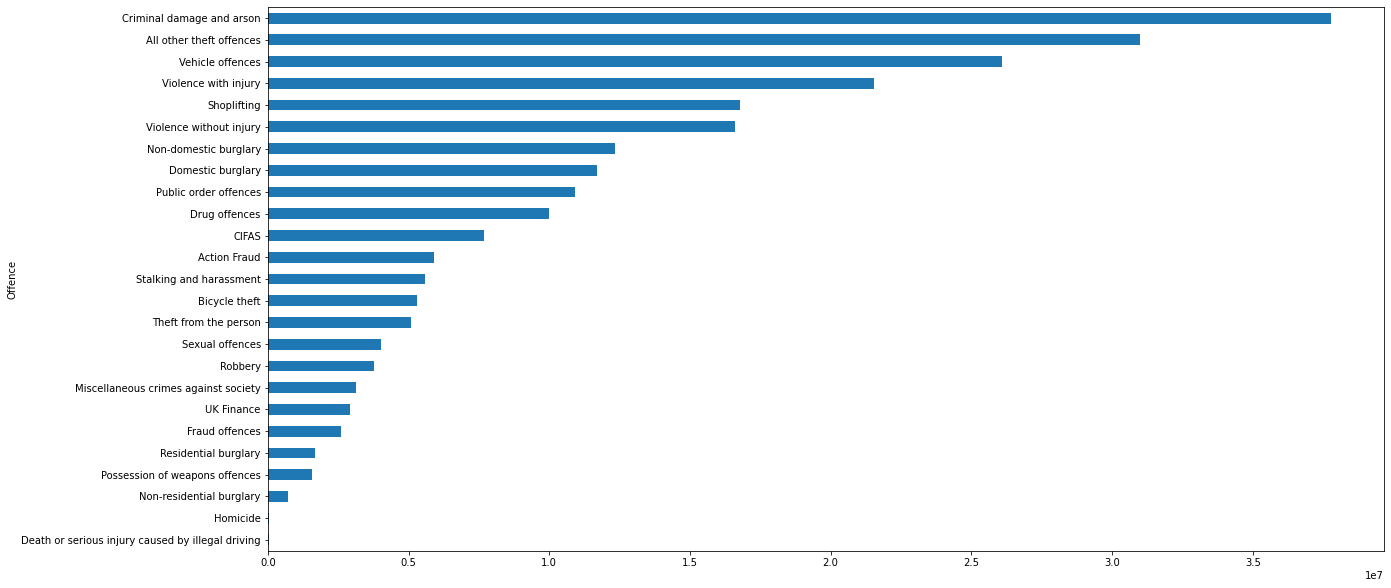

In [76]:
offence_data.plot.barh(x="offence", y="cases", figsize = (20, 10));

Графа "все прочие" является очень большой. С этим нужно будет что-то сделать.

Посмотрим как изменялась криминальная напряжённость в течение всего периода.

In [77]:
time_offence = df.groupby("12 months ending").sum()["Rolling year total number of offences"]

<AxesSubplot:xlabel='12 months ending'>

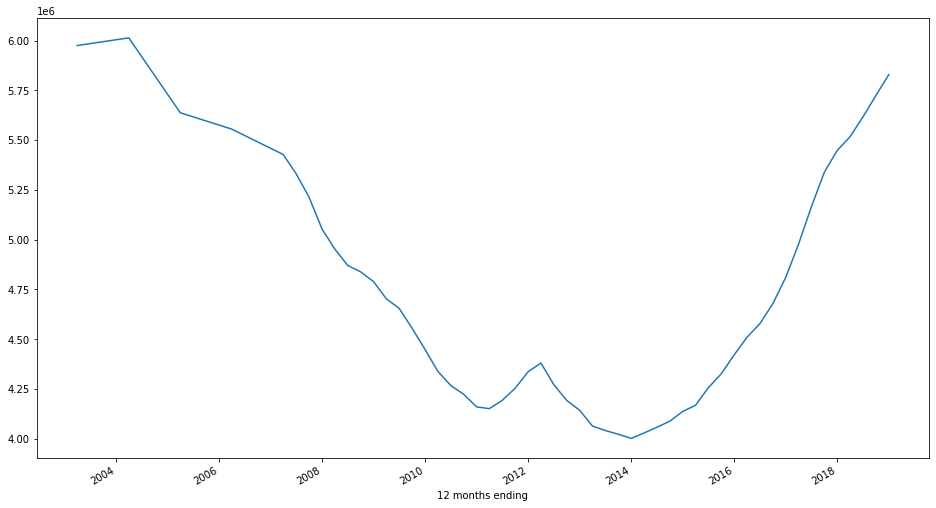

In [78]:
time_offence.plot(figsize = (16, 9))

Теперь посмотрим какой район полиции самый загруженный

In [91]:
PFA_offence = df.groupby("PFA").sum()["Rolling year total number of offences"].sort_values()

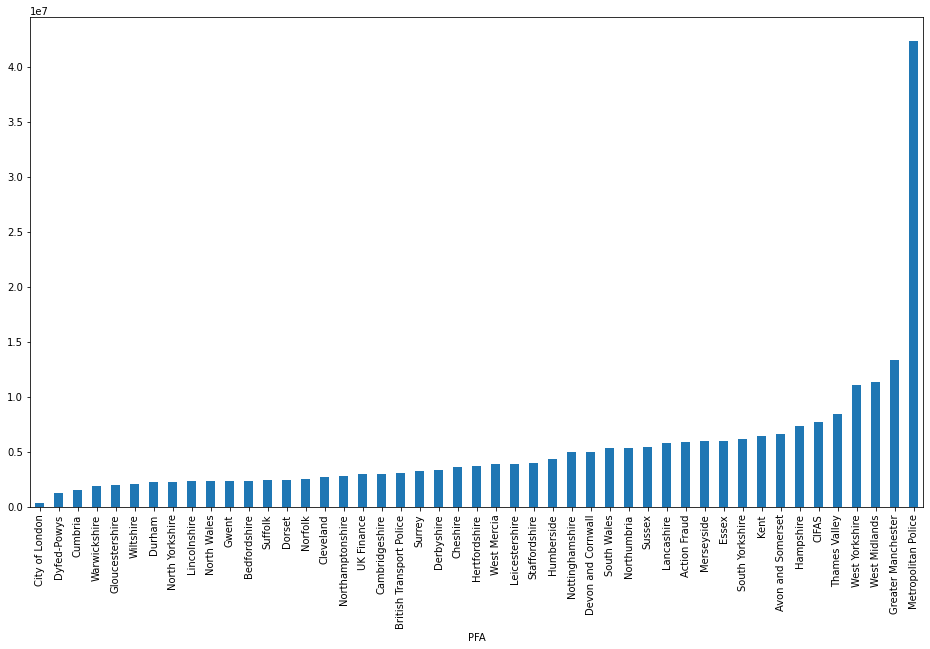

In [80]:
PFA_offence.plot.bar(figsize = (16, 9));

Похоже, что столичной полиции живётся не сладко

Найдём самый криминальный район.

In [92]:
Region_offence = df.groupby("Region").sum()["Rolling year total number of offences"].sort_values()

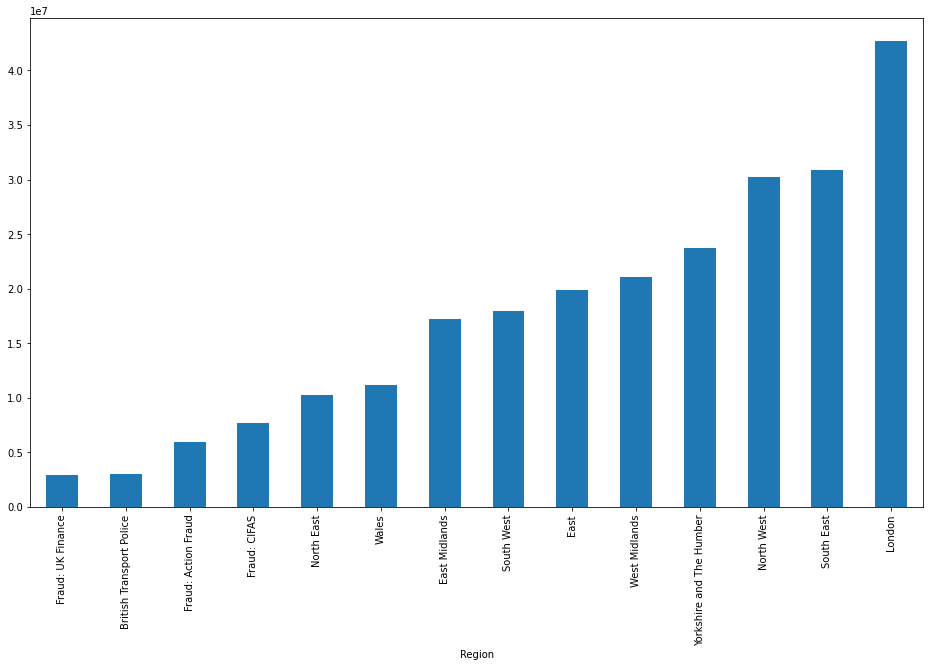

In [82]:
Region_offence.plot.bar(figsize = (16, 9));

Похоже, что данному дата сету не хватает данных о количестве жителей в регионах, а также количестве полицейских. Потому что очевидно, что чем больше в районе людей тем больше преступлений. Было бы куда полезней иметь информацию о количестве правонарушений на, например, 100 тыс жителей.

Давайте посмотрим на распределение преступлений в "самом опасном" районе и средней опасности

In [83]:
London_df = df.loc[df["Region"] == "London"]
offence_in_Lnd = London_df.groupby("Offence").sum()["Rolling year total number of offences"].sort_values()
Wales_df = df.loc[df["Region"] == "Wales"]
offence_in_Wales = Wales_df.groupby("Offence").sum()["Rolling year total number of offences"].sort_values()

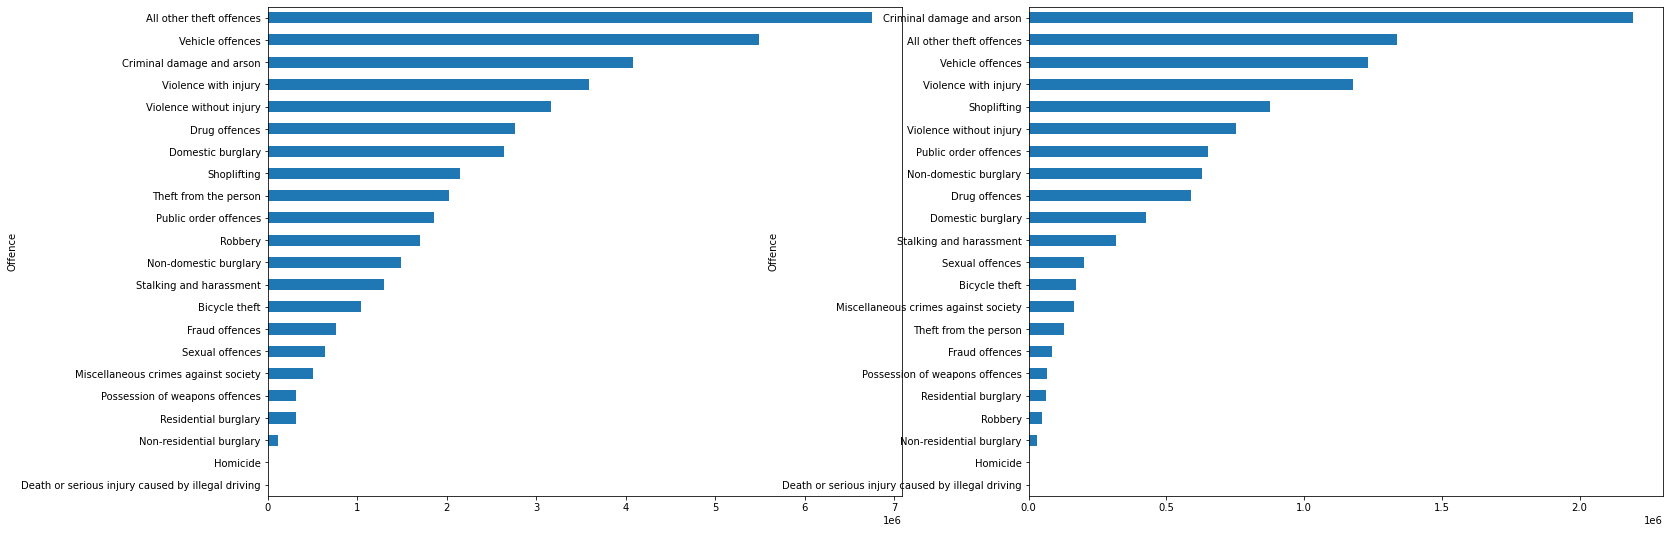

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2)
offence_in_Lnd.plot.barh(ax=axes[0], figsize=(20, 8));
offence_in_Wales.plot.barh(ax=axes[1], figsize=(25, 9));

Заметны некоторые различия, такие как: ущерб имуществу и поджог доминируют в Уэльсе куда больше, чем в Лондоне; организованные грабёжи банд и кражи отдельных лиц в Лонде намного распространённее. Но в целом портреты преступлений в разных точках похожи, что говорит об глобальных, одинаковых для всех мест проблемах.

Я заметил странный элемент CIFAS, который повторяется в 3 столбцах: это и полицейское отделение, и регион страны, и вид преступления. Найдём ещё повторяющиеся столбцы и попытаемся понять что это.

In [85]:
same_df = df.loc[df["PFA"] == df["Offence"]]
same_df

,PFA,Region,Offence,Rolling year total number of offences
12 months ending,,,,
2011-06-30,Action Fraud,Fraud: Action Fraud,Action Fraud,8140
2011-06-30,CIFAS,Fraud: CIFAS,CIFAS,52334
2011-06-30,UK Finance,Fraud: UK Finance,UK Finance,34266
2011-09-30,Action Fraud,Fraud: Action Fraud,Action Fraud,19613
2011-09-30,CIFAS,Fraud: CIFAS,CIFAS,109192
...,...,...,...,...
2018-09-30,CIFAS,Fraud: CIFAS,CIFAS,279613
2018-09-30,UK Finance,Fraud: UK Finance,UK Finance,74889
2018-12-31,Action Fraud,Fraud: Action Fraud,Action Fraud,306126


Видим странные данные, которые начинаются лишь с 2011 года, хотя датасет ведётся с 2003 г. Во всех трёх столбцах по-сути записано одно и то же.
Погуглив, узнаём, что 
Action Fraud - это национальное бюро по расследованию случаев мошенничества - это полицейское подразделение в Соединенном Королевстве, которое занимается сбором и анализом разведывательных данных, касающихся мошенничества и киберпреступлений, мотивированных в финансовом отношении.
CIFAS - это служба предотвращения мошенничества в Великобритании. Это некоммерческая членская ассоциация, представляющая организации из государственного, частного и добровольного секторов.
UK Finance - это торговая ассоциация для сектора банковских и финансовых услуг Великобритании, образованная 1 июля 2017 года. Она представляет около 300 фирм в Великобритании, предоставляющих кредитные, банковские, рыночные и платежные услуги.
По всей видимости, это организации, составляющие свою статистику по преступлению мошенничество. Очень не удобных данные, особенно не понятна ситуация с UK Finance, потому что основана на в 2017 году, а данные о преступлениях есть с 2011. Нужно будет как-то преобразовать или и вовсе удалить эти данные.

Давайте посмотрим как менялось количество мошенников в  разных секторах с  течением времени

<AxesSubplot:xlabel='12 months ending'>

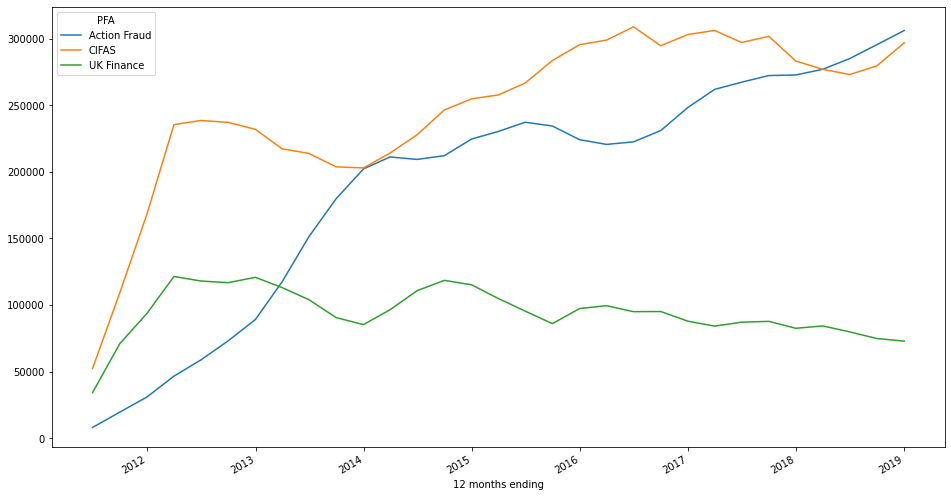

In [86]:
same_df.pivot_table('Rolling year total number of offences', '12 months ending', 'PFA', aggfunc='mean').plot(figsize = (16,9))


Давайте посмотрим где было совершено больше всего убийств

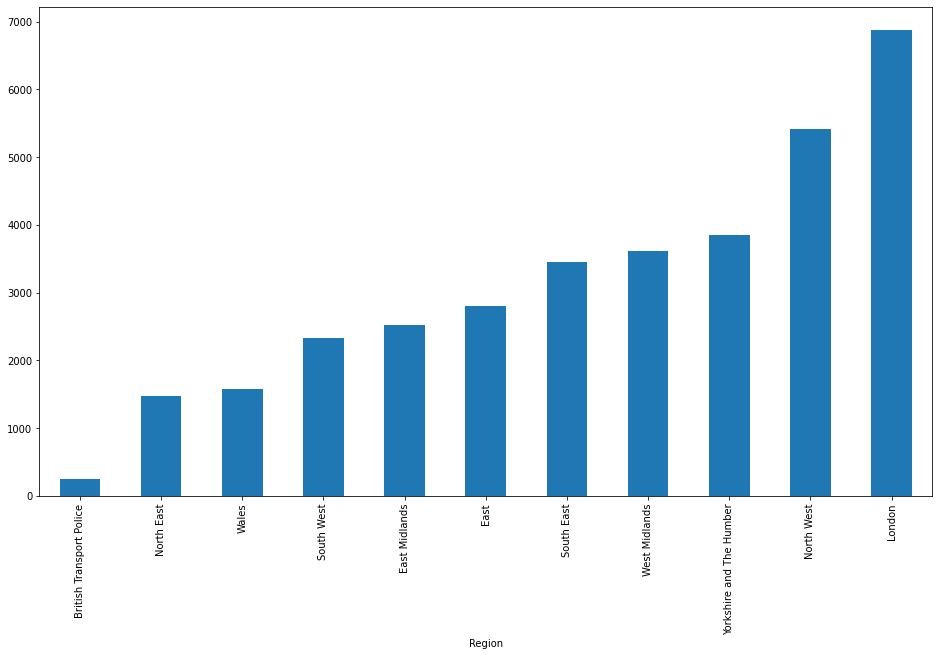

In [87]:
Homicide_df = df.loc[df["Offence"] == "Homicide"]
Homicides = Homicide_df.groupby("Region").sum()["Rolling year total number of offences"].sort_values()
Homicides.plot.bar(figsize = (16, 9));

Видим, что юго-восток стал намного левее, значит доля убийств стреди всех преступлений в нём меньше, чем в других регионах.

Где больше всего воруют велосипедов?

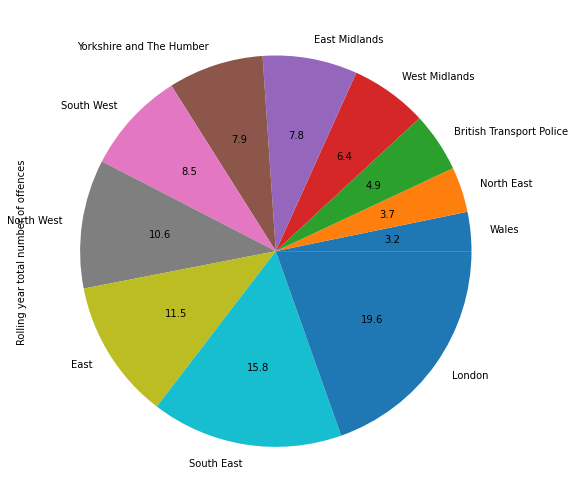

In [98]:
Bicyc_theft = df.loc[df["Offence"] == "Bicycle theft"]
Region_Bicyc_theft = Bicyc_theft.groupby("Region").sum()["Rolling year total number of offences"].sort_values()
Region_Bicyc_theft.plot.pie(autopct="%.1f", figsize = (16, 9));

Восточный район с 6 места по общему количеству переместился на 3 в велосипедах, а северо-западный с 7 на 4. В этих районах явно большие проблемы с этим. Зато западный мидланд с 5 места упал на 8, значит здесь превалируют другие преступления.

Как менялась криминогенная обстановка в Йоркшире и Хамбере за всё время.

<AxesSubplot:xlabel='12 months ending'>

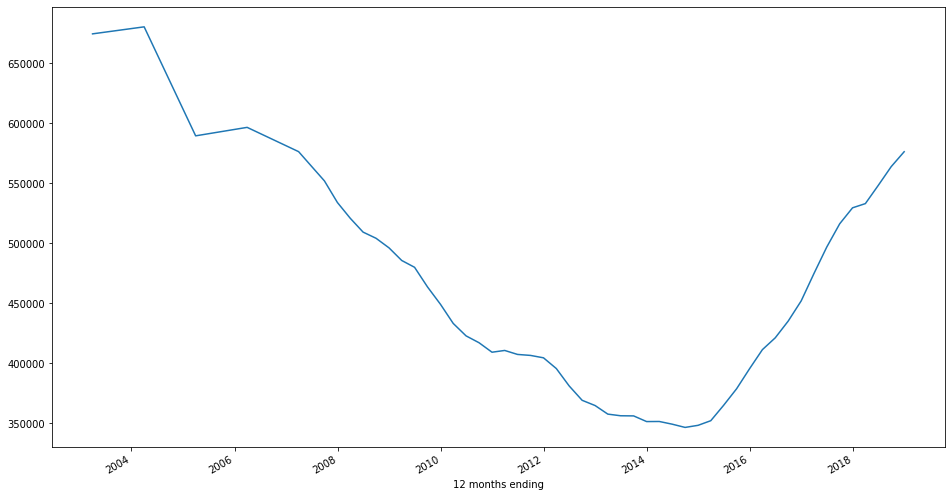

In [100]:
Yorkshire = df.loc[df["Region"] == "Yorkshire and The Humber"]
Yorkshire_time = Yorkshire.groupby("12 months ending").sum()["Rolling year total number of offences"]
Yorkshire_time.plot(figsize = (16, 9))

Интересно, что здесь нет двойного минимума, как на общем графике. Получается в 2012 году здесь не было всплеска преступности по сравнению с 2011.

Посмотрим на изменение случаев ограбления магазинов в полицейском отделе Кент

<AxesSubplot:xlabel='12 months ending'>

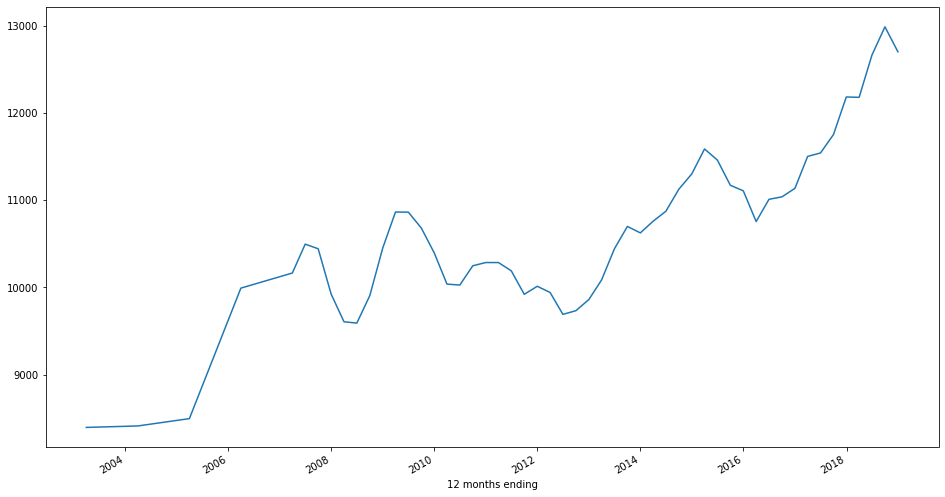

In [104]:
Kent_lift = df.loc[(df["PFA"] == "Kent") & (df["Offence"] == "Shoplifting")]
Kent_lift_time = Kent_lift.groupby("12 months ending").sum()["Rolling year total number of offences"]
Kent_lift_time.plot(figsize = (16, 9))

Похоже что мы нашли преступление, не поддающееся общей тенденции изменения количества преступлений. Аппроксимирующая растёт и довольно круто.